# From Code to Trends-A Data Analysis of Developer Survey Results 2024

### For Data Engineers 

### Introduction

In the ever-evolving landscape of technology, understanding the perspectives and experiences of developers is crucial. The annual Stack Overflow Developer Survey provides a comprehensive overview of the developer community, capturing insights from tens of thousands of respondents worldwide. This analysis focuses specifically on data engineers, delving into their unique views and experiences.

Our goal is to uncover key trends and sentiments among data engineers, exploring their preferred tools, technologies, and work environments. By examining the survey data, we aim to provide a detailed understanding of the challenges and opportunities faced by data engineers in today's tech industry. This analysis will shed light on their attitudes towards emerging technologies and the factors that influence their job satisfaction.

Through this focused lens, we hope to offer valuable insights that can inform industry practices, guide career development, and enhance the overall understanding of the data engineering profession.

#### Let's Start with Importing required packages

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Now we can Load the data set

In [2]:
# Available 2024 stack-overflow survey data set
df = pd.read_csv('survey_results_public.csv')
# Available schema for the same data set
df_s = pd.read_csv('survey_results_schema.csv') # Uploaded schema to see what each column refers to.

#### Let's see the data frame

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
df_s.head()

,qname,question
0,MainBranch,Which of the following options best describes ...
1,Age,What is your age?*
2,Employment,Which of the following best describes your cur...
3,RemoteWork,Which best describes your current work situation?
4,Check,Just checking to make sure you are paying atte...


In [5]:
df.shape

(65437, 114)

In [6]:
df_s.shape

(87, 2)

#### Let's filter out only required columns

In [7]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [8]:
# drop the column which we will not use for our analysis.
df =df.drop(columns = ['Check','PurchaseInfluence','BuyNewTool','BuildvsBuy','TechEndorse','Knowledge_1',
 'Knowledge_2',
 'Knowledge_3',
 'Knowledge_4',
 'Knowledge_5',
 'Knowledge_6',
 'Knowledge_7',
 'Knowledge_8',
 'Knowledge_9',
 'Frequency_1',
 'Frequency_2',
 'Frequency_3','JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'SurveyLength',
 'SurveyEase',
 'ConvertedCompYearly',
 'JobSat'])

In [9]:
# now let's see tha data frame shape
df.shape

(65437, 84)

In [10]:
df.isna().sum()

ResponseId                  0
MainBranch                  0
Age                         0
Employment                  0
RemoteWork              10631
                        ...  
Frustration             37186
ProfessionalTech        37673
ProfessionalCloud       36946
ProfessionalQuestion    36630
Industry                36579
Length: 84, dtype: int64

#### our analysis is centered to Developers from Data domain only.
we will filter out the results for data developers and do the analysis on that.

In [11]:
# we will find the list of developers type in our data set and from that we will filter out for data domain only
df['DevType'].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [12]:
#intrested Developer type
data_dev = ['Data scientist or machine learning specialist','Data or business analyst','Developer, AI', 'Scientist','Engineer, site reliability','Data engineer']

### survey result for developers from data domain.

In [13]:
df = df[df['DevType'].isin(data_dev)]

In [14]:
df.shape

(3850, 84)

In [16]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Sort the columns by the number of NaN values in descending order
sorted_na_counts = na_counts.sort_values(ascending=False)

# Get the top 20 columns with the maximum number of NaN values
top_20_na_columns = sorted_na_counts.head(10)

print("Top 20 columns with the maximum number of NaN values:")
print(top_20_na_columns)

Top 20 columns with the maximum number of NaN values:
AINextMuch less integrated       3770
AINextLess integrated            3718
AINextNo change                  3055
EmbeddedAdmired                  2958
EmbeddedWantToWorkWith           2891
AINextMuch more integrated       2857
EmbeddedHaveWorkedWith           2589
WebframeAdmired                  2359
AIToolNot interested in Using    2279
AINextMore integrated            2251
dtype: int64


In [17]:
df =df.drop(columns = [
 'TechDoc',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackAsyncAdmired',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'OfficeStackSyncAdmired',
 'AISearchDevWantToWorkWith',
 'AISearchDevAdmired',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOHow',
 'SOComm',
 'AISelect',
 'AISent',
 'AIBen',
 'AIAcc',
 'AIComplex',
 'AIToolInterested in Using',
 'AIToolNot interested in Using',
 'AINextMuch more integrated',
 'AINextNo change',
 'AINextMore integrated',
 'AINextLess integrated',
 'AINextMuch less integrated',
 'AIEthics',
 'AIChallenges',
 'TBranch',
 'ICorPM',
 'TimeAnswering',
 'Frustration',
 'ProfessionalTech',
 'ProfessionalCloud',
 'ProfessionalQuestion'])

#### Now let's see the story.

In [18]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,...,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,AISearchDevHaveWorkedWith,AIToolCurrently Using,AIThreat,WorkExp,TimeSearching,Industry
37,38,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Contribute to open-source projects;Bootstrappi...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training;Online Courses or Certific...,NaN,10,...,NaN,Python,Databricks SQL;Dynamodb;Elasticsearch;MongoDB;...,Amazon Web Services (AWS);Google Cloud;Hetzner...,Claude,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,3,...,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Learning about a codebase;Writing code;Documen...,No,3.0,30-60 minutes a day,Software Development
117,118,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Schoo...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Cassandra;Elasticsearch;MariaDB,Firebase;Hetzner;OVH,ChatGPT;GitHub Copilot;WolframAlpha,Writing code;Documenting code;Debugging and ge...,No,8.0,15-30 minutes a day,Software Development
120,121,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;SQL,BigQuery,Google Cloud,ChatGPT;Google Gemini,Learning about a codebase;Writing code;Debuggi...,No,9.0,Less than 15 minutes a day,Banking/Financial Services
146,147,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Blogs;Written Tutorials;Stack Overflow;How-to ...,23,...,NaN,HTML/CSS;SQL;VBA,Microsoft Access;Microsoft SQL Server;MySQL,NaN,NaN,NaN,NaN,23.0,30-60 minutes a day,Banking/Financial Services


In [19]:
# Function to convert string to array
def convert_to_array(string):
    return string.split(',')

# Apply the function to the column
df['Employment'] = df['Employment'].apply(convert_to_array)

print (df)

       ResponseId                                         MainBranch  \
37             38                     I am a developer by profession   
72             73                     I am a developer by profession   
117           118                     I am a developer by profession   
120           121  I am not primarily a developer, but I write co...   
146           147                     I am a developer by profession   
...           ...                                                ...   
65121       65122                     I am a developer by profession   
65209       65210                     I am a developer by profession   
65232       65233                     I am a developer by profession   
65247       65248                     I am a developer by profession   
65324       65325                     I am a developer by profession   

                   Age                                         Employment  \
37     25-34 years old                             [Employ

In [20]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,...,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,AISearchDevHaveWorkedWith,AIToolCurrently Using,AIThreat,WorkExp,TimeSearching,Industry
37,38,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,Contribute to open-source projects;Bootstrappi...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training;Online Courses or Certific...,NaN,10,...,NaN,Python,Databricks SQL;Dynamodb;Elasticsearch;MongoDB;...,Amazon Web Services (AWS);Google Cloud;Hetzner...,Claude,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN
72,73,I am a developer by profession,18-24 years old,"[Employed, full-time;Student, full-time;Inde...","Hybrid (some remote, some in-person)",Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,3,...,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Learning about a codebase;Writing code;Documen...,No,3.0,30-60 minutes a day,Software Development
117,118,I am a developer by profession,18-24 years old,"[Employed, full-time;Independent contractor, ...",Remote,Hobby;Contribute to open-source projects;Schoo...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Cassandra;Elasticsearch;MariaDB,Firebase;Hetzner;OVH,ChatGPT;GitHub Copilot;WolframAlpha,Writing code;Documenting code;Debugging and ge...,No,8.0,15-30 minutes a day,Software Development
120,121,"I am not primarily a developer, but I write co...",25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;SQL,BigQuery,Google Cloud,ChatGPT;Google Gemini,Learning about a codebase;Writing code;Debuggi...,No,9.0,Less than 15 minutes a day,Banking/Financial Services
146,147,I am a developer by profession,35-44 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Blogs;Written Tutorials;Stack Overflow;How-to ...,23,...,NaN,HTML/CSS;SQL;VBA,Microsoft Access;Microsoft SQL Server;MySQL,NaN,NaN,NaN,NaN,23.0,30-60 minutes a day,Banking/Financial Services


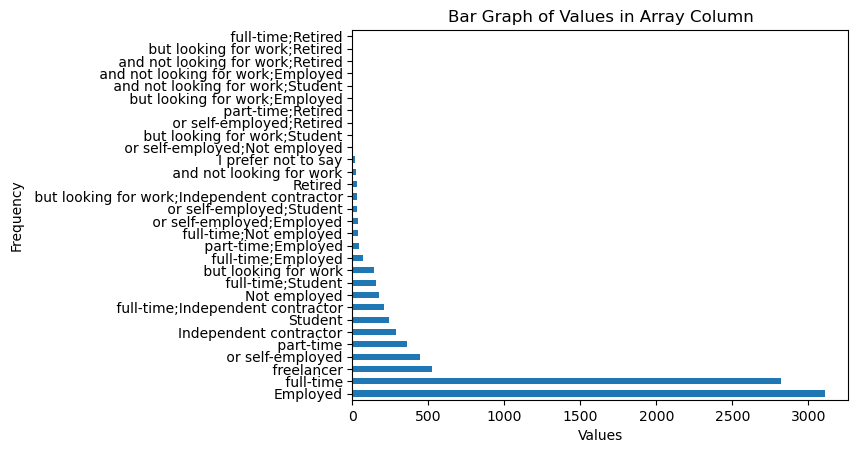

In [21]:
value_counts = df['Employment'].explode().value_counts()

# Plot the bar graph
value_counts.plot(kind='barh')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Bar Graph of Values in Array Column')
plt.show()

In [22]:
# let's filter out the employed data
# Value to filter by
filter_value = 'Employed'

# Function to check if the value is in the array
def contains_value(array, value):
    return value in array

# Apply the function to filter the DataFrame
filtered_df = df[df['Employment'].apply(lambda x: contains_value(x, filter_value))]

print(filtered_df)

       ResponseId                                         MainBranch  \
37             38                     I am a developer by profession   
72             73                     I am a developer by profession   
117           118                     I am a developer by profession   
120           121  I am not primarily a developer, but I write co...   
146           147                     I am a developer by profession   
...           ...                                                ...   
65121       65122                     I am a developer by profession   
65209       65210                     I am a developer by profession   
65232       65233                     I am a developer by profession   
65247       65248                     I am a developer by profession   
65324       65325                     I am a developer by profession   

                   Age                                         Employment  \
37     25-34 years old                             [Employ

In [23]:
filtered_df.shape

(3108, 25)

In [24]:
filtered_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,...,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,AISearchDevHaveWorkedWith,AIToolCurrently Using,AIThreat,WorkExp,TimeSearching,Industry
37,38,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,Contribute to open-source projects;Bootstrappi...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training;Online Courses or Certific...,NaN,10,...,NaN,Python,Databricks SQL;Dynamodb;Elasticsearch;MongoDB;...,Amazon Web Services (AWS);Google Cloud;Hetzner...,Claude,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN
72,73,I am a developer by profession,18-24 years old,"[Employed, full-time;Student, full-time;Inde...","Hybrid (some remote, some in-person)",Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,3,...,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Learning about a codebase;Writing code;Documen...,No,3.0,30-60 minutes a day,Software Development
117,118,I am a developer by profession,18-24 years old,"[Employed, full-time;Independent contractor, ...",Remote,Hobby;Contribute to open-source projects;Schoo...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Cassandra;Elasticsearch;MariaDB,Firebase;Hetzner;OVH,ChatGPT;GitHub Copilot;WolframAlpha,Writing code;Documenting code;Debugging and ge...,No,8.0,15-30 minutes a day,Software Development
120,121,"I am not primarily a developer, but I write co...",25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,...,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;SQL,BigQuery,Google Cloud,ChatGPT;Google Gemini,Learning about a codebase;Writing code;Debuggi...,No,9.0,Less than 15 minutes a day,Banking/Financial Services
146,147,I am a developer by profession,35-44 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Blogs;Written Tutorials;Stack Overflow;How-to ...,23,...,NaN,HTML/CSS;SQL;VBA,Microsoft Access;Microsoft SQL Server;MySQL,NaN,NaN,NaN,NaN,23.0,30-60 minutes a day,Banking/Financial Services


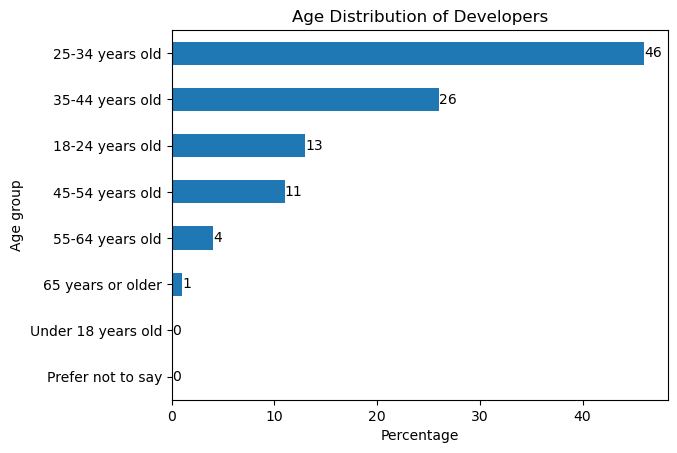

In [25]:
#let's see the age group of the survey

value_counts = filtered_df['Age'].value_counts()
percentage_counts = (value_counts / value_counts.sum()) * 100

percentage_counts = percentage_counts.round(0)
percentage_counts = percentage_counts.sort_values(ascending=True)

# Plot horizontal bar graph
ax = percentage_counts.plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.xlabel('Percentage')
plt.ylabel('Age group')
plt.title('Age Distribution of Developers')
plt.show()

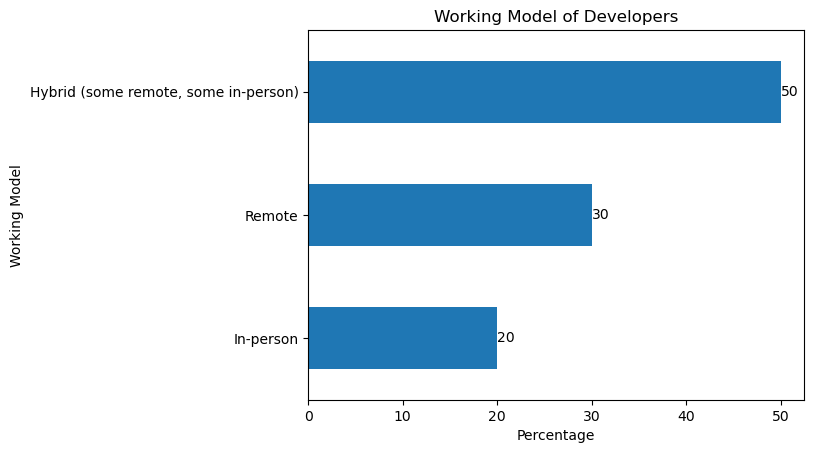

In [26]:
# what's the current working model being followed.

value_counts = filtered_df['RemoteWork'].value_counts()
percentage_counts = (value_counts / value_counts.sum()) * 100

percentage_counts = percentage_counts.round(0)
percentage_counts = percentage_counts.sort_values(ascending=True)

# Plot horizontal bar graph
ax = percentage_counts.plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.xlabel('Percentage')
plt.ylabel('Working Model')
plt.title('Working Model of Developers')
plt.show()

In [27]:
value_counts = filtered_df['EdLevel'].value_counts()
print(value_counts)

Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1272
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          1093
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         434
Some college/university study without earning a degree                                 187
Associate degree (A.A., A.S., etc.)                                                     51
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      47
Something else                                                                          16
Primary/elementary school                                                                8
Name: EdLevel, dtype: int64


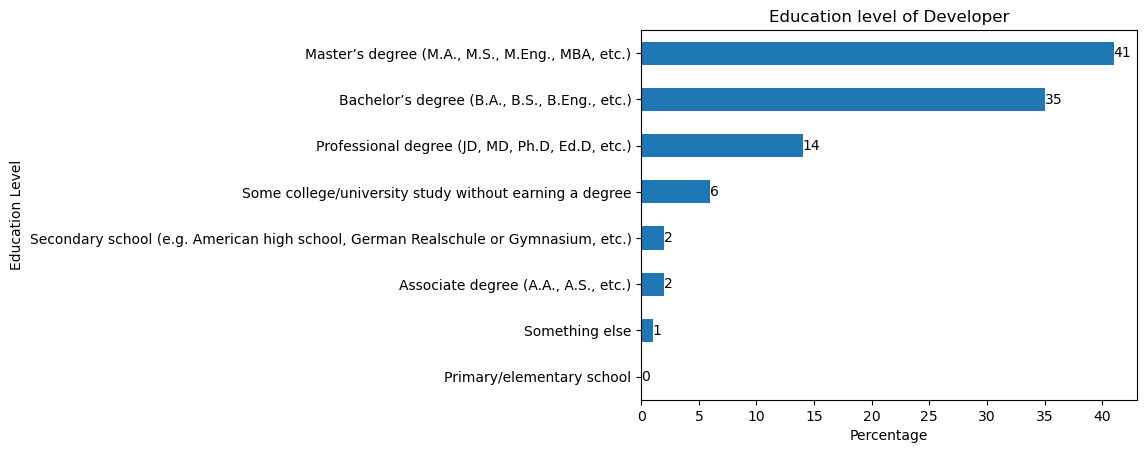

In [42]:
# what's the current working model being followed.

value_counts = filtered_df['EdLevel'].value_counts()
percentage_counts = (value_counts / value_counts.sum()) * 100

percentage_counts = percentage_counts.round(0)
percentage_counts = percentage_counts.sort_values(ascending=True)

# Plot horizontal bar graph
ax = percentage_counts.plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.title('Education level of Developer')
plt.show()

In [28]:
value_counts = filtered_df['CodingActivities'].value_counts()
##top_20 = value_counts.head(20)
print(value_counts)

Hobby                                                                                                                                                                                                            589
Hobby;Professional development or self-paced learning from online courses                                                                                                                                        435
I don’t code outside of work                                                                                                                                                                                     361
Professional development or self-paced learning from online courses                                                                                                                                              196
Hobby;Contribute to open-source projects                                                                                                            

In [40]:
value_counts = filtered_df['PlatformHaveWorkedWith'].value_counts()
top_20 = value_counts.head(3)
percentage_counts = (top_20 / top_20.sum()) * 100

print(percentage_counts)
##print(value_counts)

Amazon Web Services (AWS)    54.480287
Microsoft Azure              27.837515
Google Cloud                 17.682198
Name: PlatformHaveWorkedWith, dtype: float64


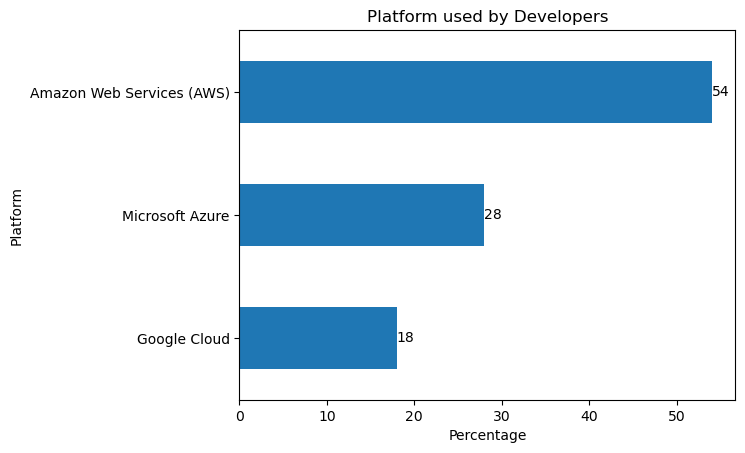

In [41]:
percentage_counts = percentage_counts.round(0)
percentage_counts = percentage_counts.sort_values(ascending=True)

# Plot horizontal bar graph
ax = percentage_counts.plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
percentage_counts.plot(kind='barh')
plt.xlabel('Percentage')
plt.ylabel('Platform')
plt.title('Platform used by Developers')
plt.show()

In [31]:
value_counts = filtered_df['Industry'].value_counts()
print(value_counts)

Software Development                          485
Other:                                        219
Banking/Financial Services                    135
Healthcare                                    135
Government                                    102
Manufacturing                                  97
Internet, Telecomm or Information Services     96
Retail and Consumer Services                   93
Fintech                                        91
Energy                                         69
Computer Systems Design and Services           67
Transportation, or Supply Chain                64
Media & Advertising Services                   54
Higher Education                               51
Insurance                                      36
Name: Industry, dtype: int64


In [32]:
value_counts = filtered_df['LearnCode'].value_counts()
value_counts.head(20)
##print(value_counts)

Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification              129
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                                          129
Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                      112
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                                                 111
On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification                               

###  Conclusion
The analysis of stack overflow survey data provides valuable insights into data engineering. From the most widely used programming languages, platforms. As demand for data engineer continue to rise, staying informed about emerging technologies, preferred platforms can help professional make strategic career decisions. Whether you are an aspiring data engineer or an experienced professional, leveraging these insights can guide skill development, job choices and long-term career planning in this dynamic field. 